# Motion Planning Algorithms for AA 174A: Principles of Robot Autonomy I

This notebook demonstrates the implementation and visualization of several motion planning algorithms in a 2D configuration space. The goal of these algorithms is to find a feasible path from a starting point to a goal region while avoiding obstacles. The configuration space is represented as a 2D grid, where the starting point, goal region, and obstacles are defined.

## Implemented Algorithms:

### 1. **RRT (Rapidly-exploring Random Tree)**
   - **Description**: RRT is a randomized algorithm designed to efficiently search nonconvex, high-dimensional spaces by randomly building a space-filling tree. The tree is constructed incrementally from samples drawn randomly from the search space.

### 2. **RRT*** (RRT Star)
   - **Description**: RRT* is an informed variant of RRT, designed to ensure asymptotic optimality. It incrementally builds a tree while minimizing the cost-to-come, ensuring that the solution path converges towards the optimal solution with an increasing number of samples.

### 3. **PRM*** (Probabilistic Roadmap Star)
   - **Description**: PRM* is a graph-based planning algorithm that constructs a roadmap in the configuration space after sampling it. It then tries to find the most cost-effective path from the start to the goal using this precomputed roadmap.

### 4. **FMT*** (Fast Marching Tree)
   - **Description**: FMT* is a sampling-based algorithm that builds a tree of paths by connecting nearby samples, ensuring that the resulting path is collision-free and optimal with high probability.

## Note:
**Highly advise you not run animation for PRM*. It will take up to 30 min (for 1000 samples)!**
Generation of animations take time (~3-5 min for 1000-2000 samples). Run them prior to live demonstration.

## Github
You can find the repository associated with this code [here](https://github.com/jjalora/AA-174-Motion-Planning-Lecture)

# Setup Notebook Environment

In [1]:
import os

# Check if you're in the correct directory
def check_directory(target_dir):
    current_dir = os.getcwd()  # Get the current working directory
    return current_dir.endswith(target_dir)

# Use the function
target_directory = "AA-174-Motion-Planning-Lecture"
cloned = check_directory(target_directory)

if not cloned:
  # Clone the GitHub repository
  !git clone https://github.com/jjalora/AA-174-Motion-Planning-Lecture.git

Cloning into 'AA-174-Motion-Planning-Lecture'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 73 (delta 24), reused 67 (delta 18), pack-reused 0
Receiving objects: 100% (73/73), 23.00 MiB | 9.74 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [2]:
# Navigate to the repo
if not cloned:
  %cd AA-174-Motion-Planning-Lecture/

!pip install -r requirements.txt

/content/AA-174-Motion-Planning-Lecture
ERROR: Could not find a version that satisfies the requirement discartes (from versions: none)
ERROR: No matching distribution found for discartes


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from algorithms import fmt_star, rrt_star, rrt, prm_star
from utils import plot_results, animate_edges_and_path, animate_edges_and_path_HTML, animate_rrt_star_HTML, visualize_prm_star

# Initialize for later
edges, V_near = None, None
seed = 962 #899, 904, 962

# Example 1: Two Boxes

In [4]:
example = 1
start = (0, 0)
# Define obstacles as polygons
obstacles = [
    (0.1, 0.1, 0.1, 0.1),
    (0.6, 0.6, 0.2, 0.2)
]
# Define goal as a polygon
goal = [(0.9, 0.9), (1, 0.9), (1, 1), (0.9, 1)]
example_name = "two boxes"

# Define the max number of points to sample

In [5]:
k = 100 # smaller: 50, larger: 100

# Run RRT Implementation

**Set ```η``` Parameter**

In [6]:
eta = 0.1

In [7]:
cost, path, V_near, label = rrt(start, goal, obstacles, k, eta, seed=seed)
params = {'k': k, 'eta': eta}

**Animate RRT Sampling Algorithm (Takes over 3 minutes to generate)**

In [8]:
animation_html = animate_edges_and_path_HTML(start, obstacles, goal, path, label, cost, edges=edges, V_near=V_near, params=params, example=example)
display(animation_html)

**(Alternatively) Plot the RRT Result**

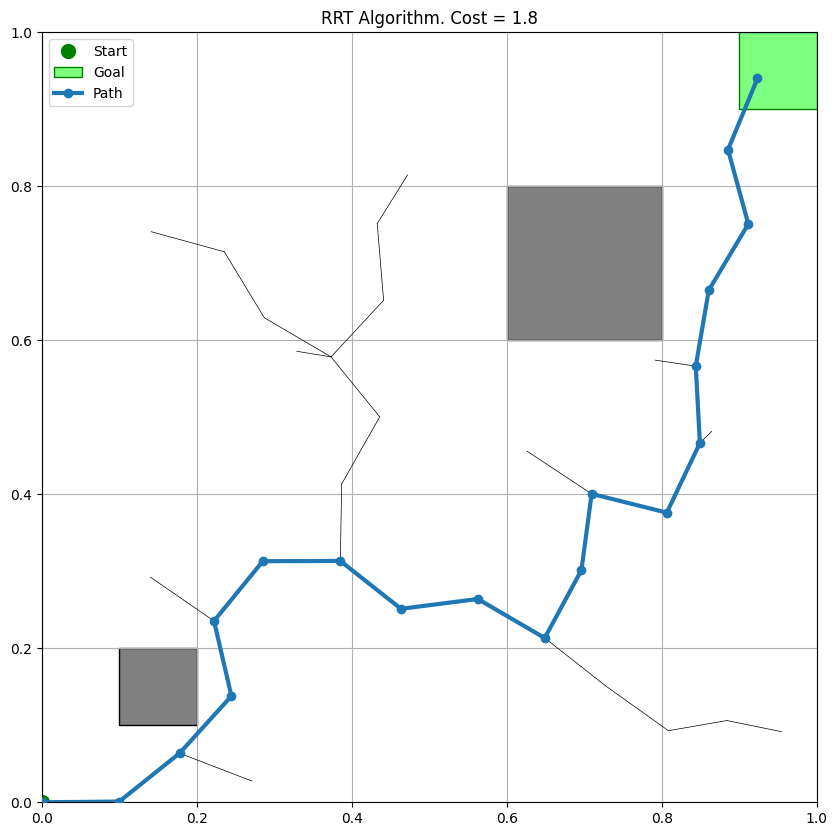

In [ ]:
# Plot
plot_results(start, obstacles, goal, path, label, cost, V_near=V_near, params=params, example=example)

# Run RRT* Implementation

**Set ```η``` Parameter**


In [ ]:
eta = 0.3

In [ ]:
cost, path, V, A, added_edges, rewired_edges, label = rrt_star(start, goal, obstacles, k, eta, seed=seed)
params = {'V': V, 'A': A, 'added_edges': added_edges, 'rewired_edges': rewired_edges}

**Animate RRT* Sampling Algorithm (Takes over 3 minutes to generate)**

In [ ]:
animation_html = animate_rrt_star_HTML(start, goal, obstacles, path, cost, params)
display(animation_html)

# Run PRM* Implementation

**Set ```η``` Parameter**

In [ ]:
eta = 1.5 #3.0 for example 2

In [ ]:
# PRM* Implementation
cost, path, edges, V, label = prm_star(start, goal, obstacles, k, eta, seed=seed)
params = {'k': k, 'eta': eta}

**Plot the PRM* Result**

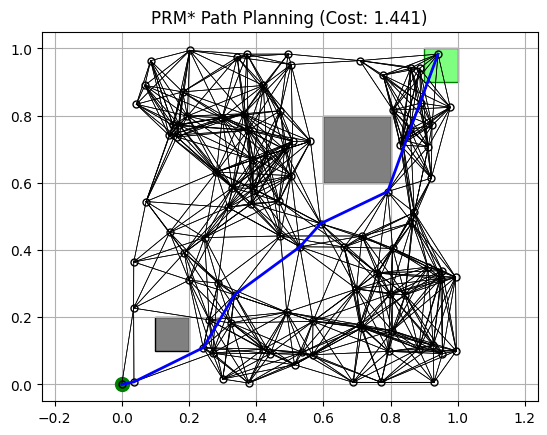

In [ ]:
# Plot
visualize_prm_star(start, goal, obstacles, path, edges, cost, V)

# Run FMT* Implementation

**Set ```η``` Parameter**

In [ ]:
eta = 1.5

In [ ]:
# FMTstar Implementation
cost, path, edges, V_near, label = fmt_star(start, goal, obstacles, k, eta, seed=seed)
params = {'k': k, 'eta': eta}

**Animate FMT* Sampling Algorithm (Takes over 3 minutes to generate)**


In [ ]:
animation_html = animate_edges_and_path_HTML(start, obstacles, goal, path, label, cost, edges=edges, V_near=V_near, params=params, example=example, static_nodes=True)
display(animation_html)

**(Alternatively) Plot the FMT* Result**

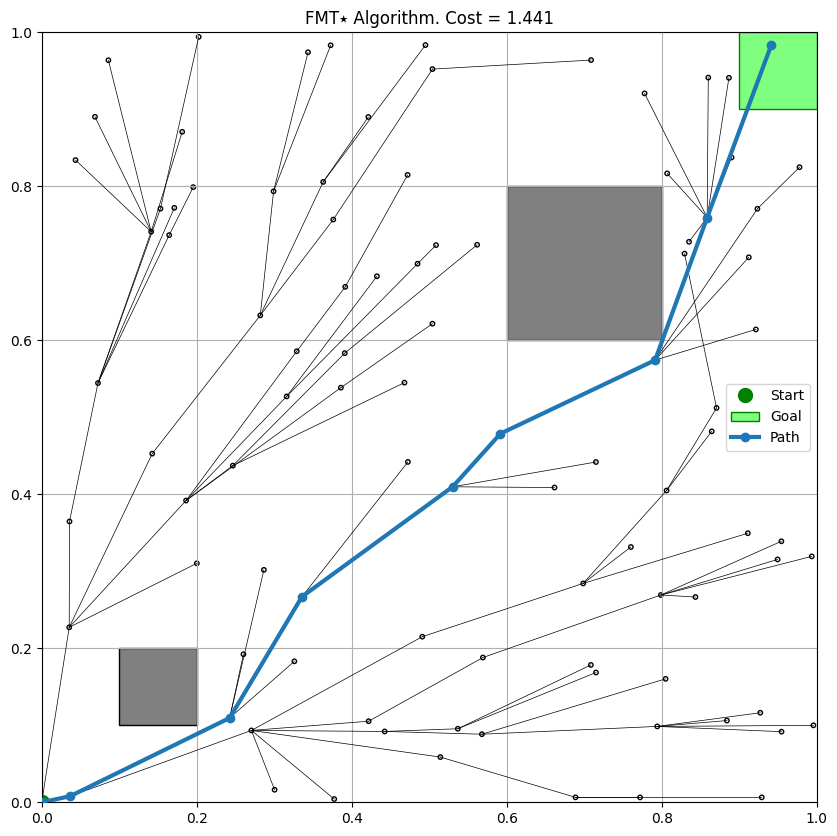

In [ ]:
# Plot
plot_results(start, obstacles, goal, path, label, cost, edges=edges, V_near=V_near, params=params, example=example, static_nodes=True)